In [1]:
library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read_csv("train.csv")

Rows: 1710670 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): CALL_TYPE, DAY_TYPE, POLYLINE
dbl (5): TRIP_ID, ORIGIN_CALL, ORIGIN_STAND, TAXI_ID, TIMESTAMP
lgl (1): MISSING_DATA

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
number_of_rows <- nrow(df)
number_of_rows

[1] 1710670

In [4]:
number_of_distinct_taxi_stands <- n_distinct(df["ORIGIN_STAND"])
number_of_distinct_taxi_stands

[1] 64

In [5]:
number_of_distinct_taxi_stands <- n_distinct(df$ORIGIN_STAND)
number_of_distinct_taxi_stands

[1] 64

In [6]:
number_of_distinct_origin_calls <- n_distinct(df$ORIGIN_CALL)
number_of_distinct_call_type <- n_distinct(df$CALL_TYPE)
number_of_distinct_day_type <- n_distinct(df$DAY_TYPE)

In [7]:
number_of_distinct_origin_calls

[1] 57106

In [8]:
number_of_distinct_call_type

[1] 3

In [9]:
number_of_distinct_day_type

[1] 1

In [10]:
head(df)

TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>
1.372637e+18,C,NA,NA,20000589,1372636858,A,FALSE,"[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]"
1.372637e+18,B,NA,7,20000596,1372637303,A,FALSE,"[[-8.639847,41.159826],[-8.640351,41.159871],[-8.642196,41.160114],[-8.644455,41.160492],[-8.646921,41.160951],[-8.649999,41.161491],[-8.653167,41.162031],[-8.656434,41.16258],[-8.660178,41.163192],[-8.663112,41.163687],[-8.666235,41.1642],[-8.669169,41.164704],[-8.670852,41.165136],[-8.670942,41.166576],[-8.66961,41.167962],[-8.668098,41.168988],[-8.66664,41.170005],[-8.665767,41.170635],[-8.66574,41.170671]]"
1.372637e+18,C,NA,NA,20000320,1372636951,A,FALSE,"[[-8.612964,41.140359],[-8.613378,41.14035],[-8.614215,41.140278],[-8.614773,41.140368],[-8.615907,41.140449],[-8.616609,41.140602],[-8.618472,41.141412],[-8.620623,41.142789],[-8.622558,41.144094],[-8.62506,41.144805],[-8.627436,41.144733],[-8.630082,41.145174],[-8.6319,41.146461],[-8.632584,41.147316],[-8.631252,41.148774],[-8.629713,41.150628],[-8.628804,41.152077],[-8.628579,41.152464],[-8.62875,41.152662],[-8.630424,41.15277],[-8.632683,41.152779],[-8.635131,41.152563],[-8.637705,41.153013],[-8.64036,41.15358],[-8.642205,41.154021],[-8.644068,41.154507],[-8.646453,41.154336],[-8.648613,41.1543],[-8.649504,41.154336],[-8.649837,41.154354],[-8.649837,41.1543],[-8.649882,41.154282],[-8.649936,41.1543],[-8.6499,41.154264],[-8.599383,41.141736],[-8.59653,41.140566],[-8.65008,41.154291],[-8.650395,41.153814],[-8.650377,41.153832],[-8.650359,41.153787],[-8.649891,41.153166],[-8.649369,41.152572],[-8.649198,41.152374],[-8.649711,41.151213],[-8.649117,41.150466],[-8.649117,41.149062],[-8.648613,41.148261],[-8.648424,41.148225],[-8.647587,41.148405],[-8.64594,41.148414],[-8.643861,41.148135],[-8.642763,41.148027],[-8.640918,41.14836],[-8.637759,41.148351],[-8.635338,41.147964],[-8.633277,41.147172],[-8.631513,41.146146],[-8.629776,41.14503],[-8.627814,41.144643],[-8.625996,41.144769],[-8.624088,41.144463],[-8.621325,41.143401],[-8.619444,41.141961],[-8.617365,41.140863],[-8.61597,41.14053]]"
1.372637e+18,C,NA,NA,20000520,1372636854,A,FALSE,"[[-8.574678,41.151951],[-8.574705,41.151942],[-8.574696,41.151933],[-8.57466,41.15196],[-8.574723,41.151933],[-8.574714,41.151924],[-8.574714,41.151924],[-8.575164,41.150934],[-8.577135,41.150232],[-8.57853,41.148639],[-8.579745,41.147316],[-8.579358,41.146173],[-8.580744,41.14503],[-8.582904,41.14512],[-8.58438,41.146479],[-8.610849,41.145876],[-8.610012,41.146479],[-8.609058,41.146866],[-8.608968,41.147055],[-8.586027,41.148702],[-8.587197,41.149224],[-8.588205,41.148963],[-8.588835,41.147604],[-8.590176,41.147082],[-8.592543,41.146614],[-8.594721,41.146245],[-8.596737,41.146317],[-8.59869,41.146119],[-8.598816,41.146101],[-8.600193,41.146155],[-8.601057,41.146101],[-8.602344,41.14575],[-8.602785,41.145705],[-8.60328,41.145597],[-8.604045,41.145417],[-8.604657,41.144256],[-8.605854,41.142555],[-8.607951,41.142753],[-8.607978,41.142825],[-8.607996,41.142879],[-8.607987,41.142888],[-8.608005,41.142915],[-8.607996,41.142915]]"
1.372637e+18,C,NA,NA,20000337,1372637091,A,FALSE,"[[-8.645994,41.18049],[-8.645949,41.180517],[-8.646048,41.180049],[-8.646804,41.178888],[-8.649495,41.178465],[-8.65215,41.177961],[-8.654049,41.177196],[-8.655012,41.177925],[-8.656353,41.177853],[-8.659647,41.177277],[-8.662518,41.177619],[-8.664561,41.179221],[-8.667432,41.178537],[-8.668944,41.176674],[-8.671374,41.17518],[-8.673894

In [11]:
temp_df <- df %>% select(-DAY_TYPE)

In [12]:
df <- temp_df

In [13]:
summary(df)

    TRIP_ID           CALL_TYPE          ORIGIN_CALL       ORIGIN_STAND   
 Min.   :1.373e+18   Length:1710670     Min.   : 2001     Min.   : 1.0    
 1st Qu.:1.381e+18   Class :character   1st Qu.: 6593     1st Qu.:15.0    
 Median :1.388e+18   Mode  :character   Median :18755     Median :27.0    
 Mean   :1.389e+18                      Mean   :24490     Mean   :30.3    
 3rd Qu.:1.397e+18                      3rd Qu.:40808     3rd Qu.:49.0    
 Max.   :1.404e+18                      Max.   :63884     Max.   :63.0    
                                        NA's   :1345900   NA's   :904091  
    TAXI_ID        TIMESTAMP         MISSING_DATA      POLYLINE        
 Min.   :2e+07   Min.   :1.373e+09   Mode :logical   Length:1710670    
 1st Qu.:2e+07   1st Qu.:1.381e+09   FALSE:1710660   Class :character  
 Median :2e+07   Median :1.388e+09   TRUE :10        Mode  :character  
 Mean   :2e+07   Mean   :1.389e+09                                     
 3rd Qu.:2e+07   3rd Qu.:1.397e+09      

In [14]:
temp_df <- df %>% filter(MISSING_DATA != TRUE) %>% select(-MISSING_DATA)
# temp_df <- select(filter(df, MISSING_DATA != TRUE), -MISSING_DATA)

In [15]:
summary(temp_df)

    TRIP_ID           CALL_TYPE          ORIGIN_CALL       ORIGIN_STAND   
 Min.   :1.373e+18   Length:1710660     Min.   : 2001     Min.   : 1.0    
 1st Qu.:1.381e+18   Class :character   1st Qu.: 6593     1st Qu.:15.0    
 Median :1.388e+18   Mode  :character   Median :18755     Median :27.0    
 Mean   :1.389e+18                      Mean   :24490     Mean   :30.3    
 3rd Qu.:1.397e+18                      3rd Qu.:40808     3rd Qu.:49.0    
 Max.   :1.404e+18                      Max.   :63884     Max.   :63.0    
                                        NA's   :1345891   NA's   :904084  
    TAXI_ID        TIMESTAMP           POLYLINE        
 Min.   :2e+07   Min.   :1.373e+09   Length:1710660    
 1st Qu.:2e+07   1st Qu.:1.381e+09   Class :character  
 Median :2e+07   Median :1.388e+09   Mode  :character  
 Mean   :2e+07   Mean   :1.389e+09                     
 3rd Qu.:2e+07   3rd Qu.:1.397e+09                     
 Max.   :2e+07   Max.   :1.404e+09                     
        

In [16]:
df <- temp_df

In [17]:
install.packages("lubridate")


The downloaded binary packages are in
	/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T//Rtmp53XmKG/downloaded_packages


In [19]:
df$TIMESTAMP <- as_datetime(df$TIMESTAMP, origin = "1970-01-01")

In [20]:
head(df)

TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,POLYLINE
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dttm>,<chr>
1.372637e+18,C,NA,NA,20000589,2013-07-01 00:00:58,"[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]"
1.372637e+18,B,NA,7,20000596,2013-07-01 00:08:23,"[[-8.639847,41.159826],[-8.640351,41.159871],[-8.642196,41.160114],[-8.644455,41.160492],[-8.646921,41.160951],[-8.649999,41.161491],[-8.653167,41.162031],[-8.656434,41.16258],[-8.660178,41.163192],[-8.663112,41.163687],[-8.666235,41.1642],[-8.669169,41.164704],[-8.670852,41.165136],[-8.670942,41.166576],[-8.66961,41.167962],[-8.668098,41.168988],[-8.66664,41.170005],[-8.665767,41.170635],[-8.66574,41.170671]]"
1.372637e+18,C,NA,NA,20000320,2013-07-01 00:02:31,"[[-8.612964,41.140359],[-8.613378,41.14035],[-8.614215,41.140278],[-8.614773,41.140368],[-8.615907,41.140449],[-8.616609,41.140602],[-8.618472,41.141412],[-8.620623,41.142789],[-8.622558,41.144094],[-8.62506,41.144805],[-8.627436,41.144733],[-8.630082,41.145174],[-8.6319,41.146461],[-8.632584,41.147316],[-8.631252,41.148774],[-8.629713,41.150628],[-8.628804,41.152077],[-8.628579,41.152464],[-8.62875,41.152662],[-8.630424,41.15277],[-8.632683,41.152779],[-8.635131,41.152563],[-8.637705,41.153013],[-8.64036,41.15358],[-8.642205,41.154021],[-8.644068,41.154507],[-8.646453,41.154336],[-8.648613,41.1543],[-8.649504,41.154336],[-8.649837,41.154354],[-8.649837,41.1543],[-8.649882,41.154282],[-8.649936,41.1543],[-8.6499,41.154264],[-8.599383,41.141736],[-8.59653,41.140566],[-8.65008,41.154291],[-8.650395,41.153814],[-8.650377,41.153832],[-8.650359,41.153787],[-8.649891,41.153166],[-8.649369,41.152572],[-8.649198,41.152374],[-8.649711,41.151213],[-8.649117,41.150466],[-8.649117,41.149062],[-8.648613,41.148261],[-8.648424,41.148225],[-8.647587,41.148405],[-8.64594,41.148414],[-8.643861,41.148135],[-8.642763,41.148027],[-8.640918,41.14836],[-8.637759,41.148351],[-8.635338,41.147964],[-8.633277,41.147172],[-8.631513,41.146146],[-8.629776,41.14503],[-8.627814,41.144643],[-8.625996,41.144769],[-8.624088,41.144463],[-8.621325,41.143401],[-8.619444,41.141961],[-8.617365,41.140863],[-8.61597,41.14053]]"
1.372637e+18,C,NA,NA,20000520,2013-07-01 00:00:54,"[[-8.574678,41.151951],[-8.574705,41.151942],[-8.574696,41.151933],[-8.57466,41.15196],[-8.574723,41.151933],[-8.574714,41.151924],[-8.574714,41.151924],[-8.575164,41.150934],[-8.577135,41.150232],[-8.57853,41.148639],[-8.579745,41.147316],[-8.579358,41.146173],[-8.580744,41.14503],[-8.582904,41.14512],[-8.58438,41.146479],[-8.610849,41.145876],[-8.610012,41.146479],[-8.609058,41.146866],[-8.608968,41.147055],[-8.586027,41.148702],[-8.587197,41.149224],[-8.588205,41.148963],[-8.588835,41.147604],[-8.590176,41.147082],[-8.592543,41.146614],[-8.594721,41.146245],[-8.596737,41.146317],[-8.59869,41.146119],[-8.598816,41.146101],[-8.600193,41.146155],[-8.601057,41.146101],[-8.602344,41.14575],[-8.602785,41.145705],[-8.60328,41.145597],[-8.604045,41.145417],[-8.604657,41.144256],[-8.605854,41.142555],[-8.607951,41.142753],[-8.607978,41.142825],[-8.607996,41.142879],[-8.607987,41.142888],[-8.608005,41.142915],[-8.607996,41.142915]]"
1.372637e+18,C,NA,NA,20000337,2013-07-01 00:04:51,"[[-8.645994,41.18049],[-8.645949,41.180517],[-8.646048,41.180049],[-8.646804,41.178888],[-8.649495,41.178465],[-8.65215,41.177961],[-8.654049,41.177196],[-8.655012,41.177925],[-8.656353,41.177853],[-8.659647,41.177277],[-8.662518,41.177619],[-8.664561,41.179221],[-8.667432,41.178537],[-8.668944,41.176674],[-8.671374,41.17518],[-8.673894,41.173308],[-8.676918,41.17

In [21]:
df$YEAR <- year(df$TIMESTAMP)

In [22]:
df$MONTH <- month(df$TIMESTAMP)
df$DAY <- day(df$TIMESTAMP)

In [23]:
# Function to count coordinates
count_seconds <- function(polyline) {
  pattern <- "\\[-?\\d+\\.\\d+,-?\\d+\\.\\d+\\]"
  matches <- gregexpr(pattern, polyline)
  total_count <- length(matches[[1]])
  total_count * 15  # 15 seconds per coordinate
}


In [24]:
num_sec <- sapply(df$POLYLINE, count_seconds)

In [25]:
df$NUM_SEC <- num_sec

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


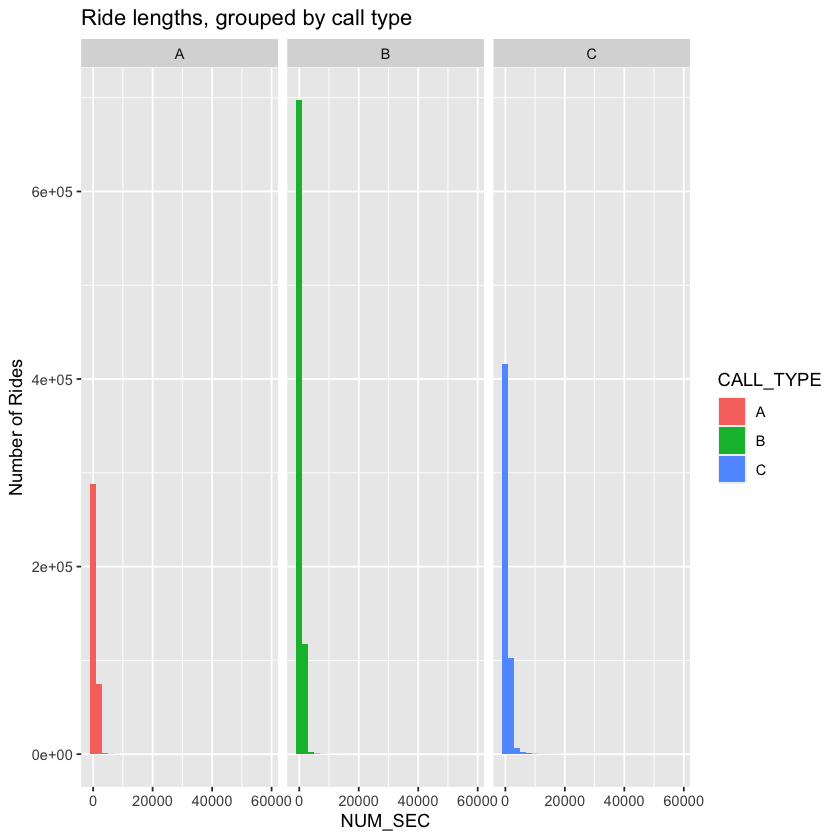

In [27]:
ggplot(df, aes(x = NUM_SEC)) +
        geom_histogram(aes(fill = CALL_TYPE)) +  # histogram geom
        labs(y = "Number of Rides", title = "Ride lengths, grouped by call type") + # labels
        facet_wrap(~CALL_TYPE)    # facet by CALL_TYPE

In [28]:
df <- df %>% arrange(-NUM_SEC)

In [29]:
p99 <- quantile(df$NUM_SEC, probs = 0.99)
p99 ## 99% of taxi rides were shorter than this time :2835 ~ 40 min

99% 
2835

In [30]:
df_outliers <- df %>% filter(NUM_SEC >= p99) 

In [31]:
df_inliers <- df %>% filter(NUM_SEC < p99) 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


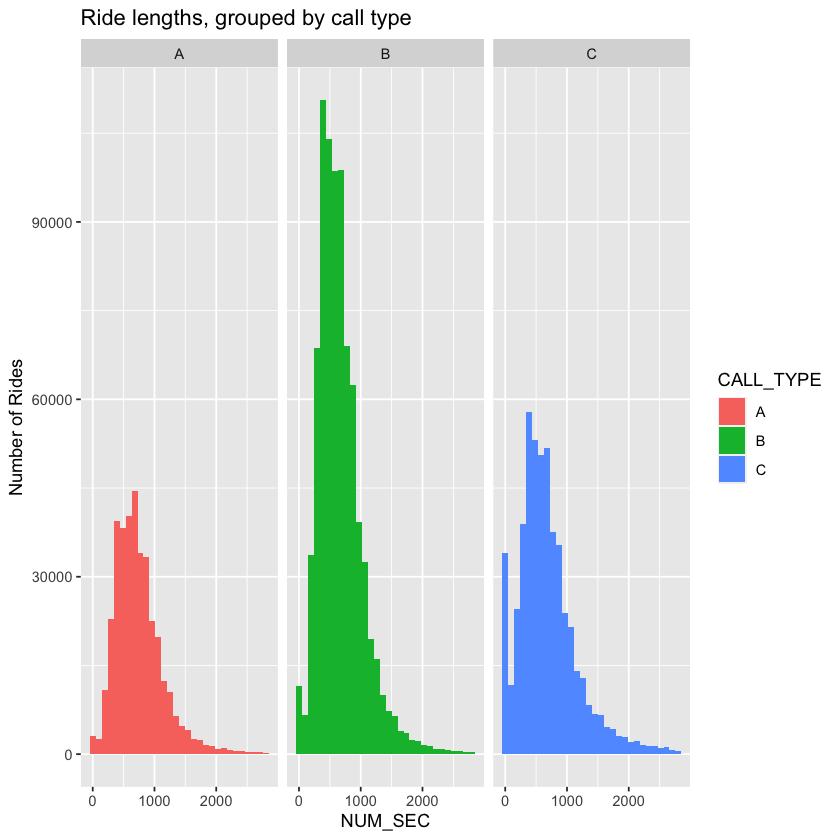

In [32]:
ggplot(df_inliers, aes(x = NUM_SEC)) +
        geom_histogram(aes(fill = CALL_TYPE)) +  # histogram geom
        labs(y = "Number of Rides", title = "Ride lengths, grouped by call type") + # labels
        facet_wrap(~CALL_TYPE)    # facet by CALL_TYPE

In [33]:
head(df_outliers) %>% select(NUM_SEC)

NUM_SEC
<dbl>
58215
58080
57540
53850
53565
46800


In [34]:
#enums in R are called factors

df_inliers$ORIGIN_STAND <- as.factor(df_inliers$ORIGIN_STAND)
drop_na_origin_stand <- drop_na(df_inliers, ORIGIN_STAND)

In [35]:
summary(drop_na_origin_stand)
### CALL_TYPE is only B as a biproduct of usgetting rid of all the ORIGIN_STAND unknown values

    TRIP_ID           CALL_TYPE          ORIGIN_CALL      ORIGIN_STAND   
 Min.   :1.373e+18   Length:803162      Min.   : NA      15     : 79746  
 1st Qu.:1.380e+18   Class :character   1st Qu.: NA      57     : 50635  
 Median :1.388e+18   Mode  :character   Median : NA      9      : 34593  
 Mean   :1.388e+18                      Mean   :NaN      33     : 34000  
 3rd Qu.:1.397e+18                      3rd Qu.: NA      23     : 33272  
 Max.   :1.404e+18                      Max.   : NA      18     : 32835  
                                        NA's   :803162   (Other):538081  
    TAXI_ID        TIMESTAMP                        POLYLINE        
 Min.   :2e+07   Min.   :2013-07-01 00:08:23.00   Length:803162     
 1st Qu.:2e+07   1st Qu.:2013-09-28 14:59:13.75   Class :character  
 Median :2e+07   Median :2013-12-25 20:07:07.00   Mode  :character  
 Mean   :2e+07   Mean   :2013-12-30 02:27:23.97                     
 3rd Qu.:2e+07   3rd Qu.:2014-04-04 10:13:49.00                

Warning message:
“Removed 326225 rows containing non-finite values (`stat_boxplot()`).”


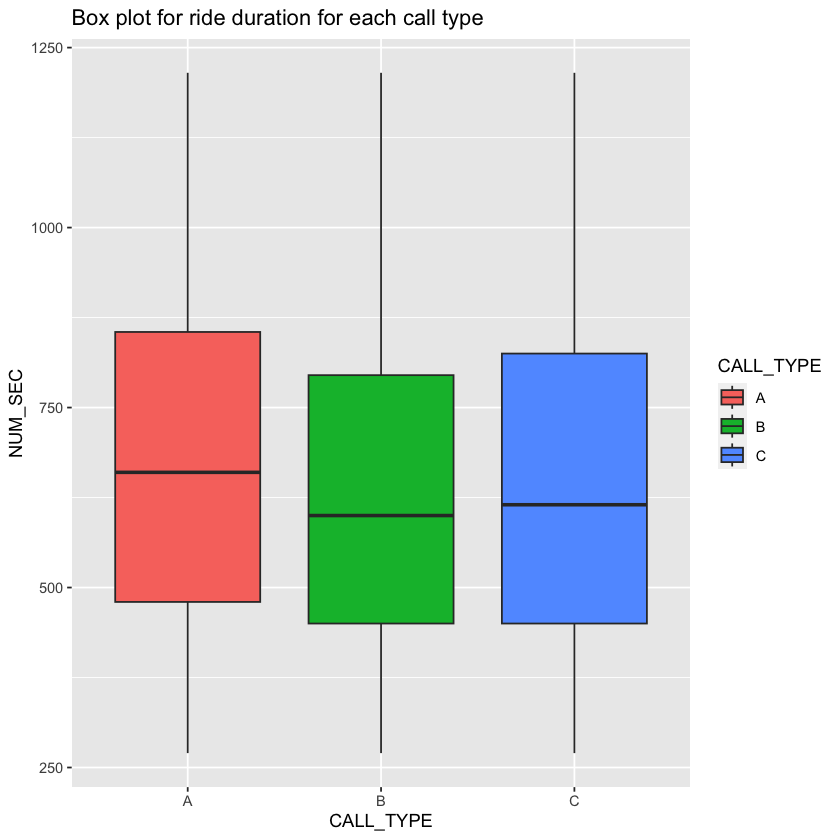

In [36]:
ggplot(df, aes(x = CALL_TYPE, y = NUM_SEC, fill = CALL_TYPE)) +
      geom_boxplot() +  # boxplot geom
      scale_y_continuous(limits = quantile(df$NUM_SEC, c(0.1, 0.9))) + # Comment this to show outliers
#       coord_flip() +  # flip coordinates
      labs(x = "CALL_TYPE", y = "NUM_SEC", title = paste("Box plot for ride duration for each call type")) # labels


Warning message:
“Removed 115488 rows containing non-finite values (`stat_boxplot()`).”


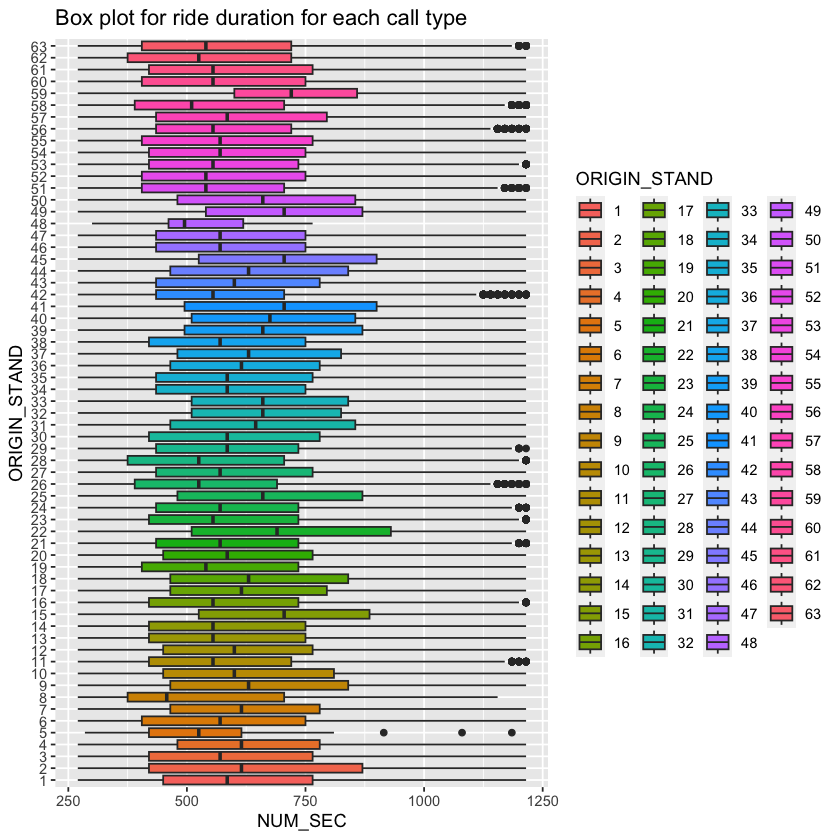

In [37]:
ggplot(drop_na_origin_stand, aes(x = ORIGIN_STAND, y = NUM_SEC, fill = ORIGIN_STAND)) +
      geom_boxplot() +  # boxplot geom
      scale_y_continuous(limits = quantile(df$NUM_SEC, c(0.1, 0.9))) + # Comment this to show outliers
      coord_flip() +  # flip coordinates
      labs(x = "ORIGIN_STAND", y = "NUM_SEC", title = paste("Box plot for ride duration for each call type")) # labels


In [38]:
library(leaflet)

In [39]:
library(jsonlite)


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




In [40]:
plotroute <- function(coords_str){
    coordinates <- fromJSON(coords_str)
    df_coordinates <- data.frame(LONGITUDE = unlist(coordinates[, 1]),
                                 LATITUDE = unlist(coordinates[, 2])) # list of lists to DF
    df_row_num <- nrow(df_coordinates)
    map <- leaflet() %>% addTiles() %>%
        addMarkers(lng = df_coordinates[1,1], lat = df_coordinates[1,2], label = "start", options = markerOptions(iconColor="red")) %>%
        addMarkers(lng = df_coordinates[df_row_num,1], lat = df_coordinates[df_row_num,2], label = "end") %>%
        addPolylines(data = coordinates, color = "Red")
    return(map)
}


In [41]:
plotroute(df_inliers$POLYLINE[1])

HTML widgets cannot be represented in plain text (need html)

In [42]:
plotroute(df_outliers$POLYLINE[1])

HTML widgets cannot be represented in plain text (need html)

In [43]:
df <- df %>% select(-POLYLINE)

In [44]:
write_csv(df, "updated_taxi_data.csv")